In [ ]:
import math
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.image as image
import matplotlib.pyplot as plt
import skimage as im
import skimage.feature
import skimage.io as imio
import skimage.transform as imtrans
import cv2
import os 
from google.colab.patches import cv2_imshow     

In [ ]:
def show_rgb(img):
  r = plt.imread(img, 0)
  plt.imshow(r, cmap='Reds')
  plt.show()
  g = plt.imread(img, 1)
  plt.imshow(g)
  plt.show()
  b = plt.imread(img, 2)
  plt.imshow(b)
  plt.show()
  return r,g,b

In [ ]:
red_channel

array([[255, 167, 164, ..., 230, 230, 255],
       [255, 168, 165, ..., 230, 230, 255],
       [255, 168, 164, ..., 230, 229, 255],
       ...,
       [255, 233, 229, ..., 225, 226, 255],
       [255, 235, 231, ..., 224, 225, 255],
       [255, 228, 225, ..., 225, 223, 255]], dtype=uint8)

In [ ]:
def show_rgb_lab(image, rgb=True):
    print("Shape", image.shape)
    if rgb:
      print("RGB full", cv2_imshow(image))

      red_channel = image[:,:,2]
      green_channel = image[:,:,1]
      blue_channel = image[:,:,0]

      print("R Channel", cv2_imshow(red_channel))
      print("G Channel", cv2_imshow(green_channel))
      print("B Channel", cv2_imshow(blue_channel))

    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    print("LAB full", cv2_imshow(image_lab))
    l_channel = image_lab[:,:,0]
    a_channel = image_lab[:,:,1]
    b_channel = image_lab[:,:,2]
    print("L Channel", cv2_imshow(l_channel))
    print("A Channel", cv2_imshow(a_channel))
    print("B Channel", cv2_imshow(b_channel))

Shape (256, 256, 4)


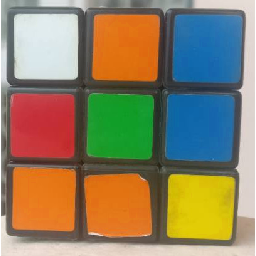

RGB full None


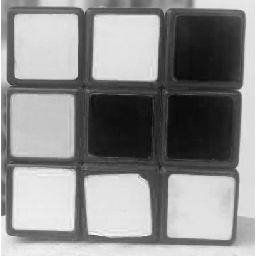

R Channel None


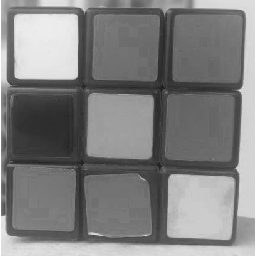

G Channel None


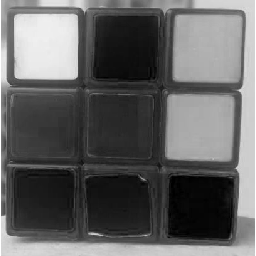

B Channel None


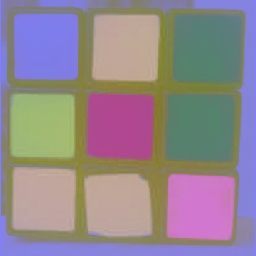

LAB full None


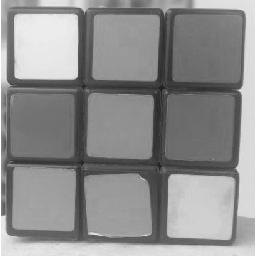

L Channel None


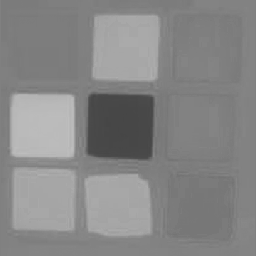

A Channel None


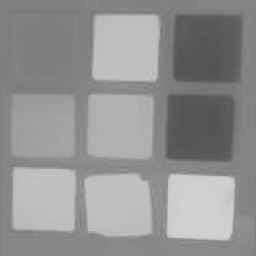

B Channel None
Shape (256, 256, 4)


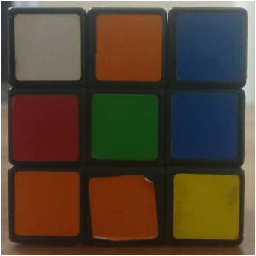

RGB full None


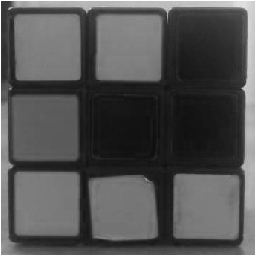

R Channel None


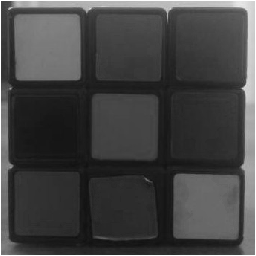

G Channel None


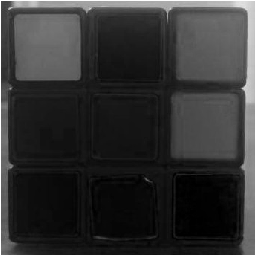

B Channel None


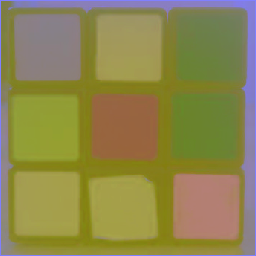

LAB full None


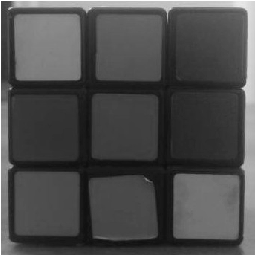

L Channel None


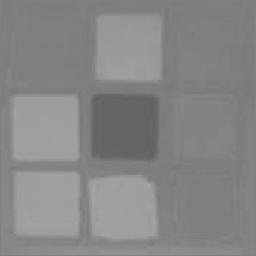

A Channel None


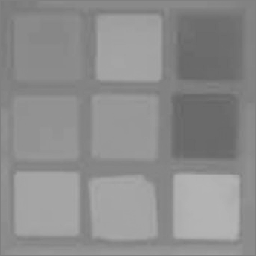

B Channel None


In [ ]:
outdoor = cv2.imread('outdoor.png', cv2.IMREAD_UNCHANGED)
indoor = cv2.imread('indoor.png', cv2.IMREAD_UNCHANGED)
show_rgb_lab(outdoor)
show_rgb_lab(indoor)

Shape (256, 256, 4)


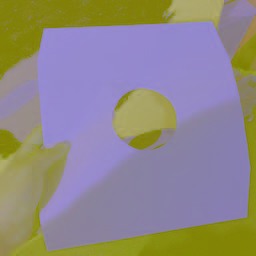

LAB full None


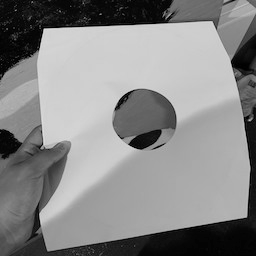

L Channel None


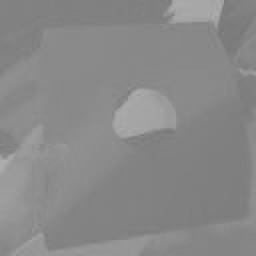

A Channel None


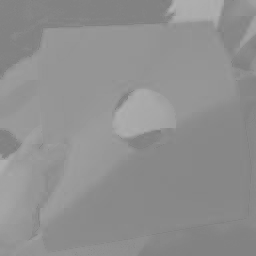

B Channel None
Shape (256, 256, 4)


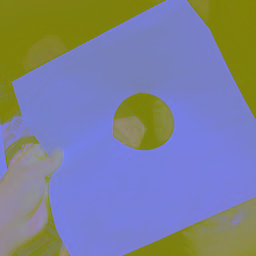

LAB full None


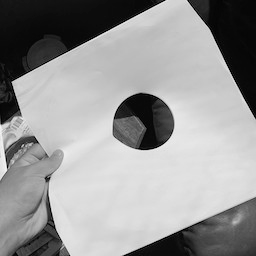

L Channel None


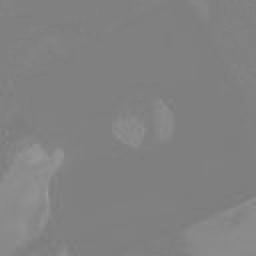

A Channel None


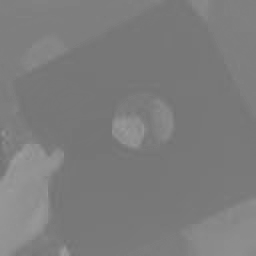

B Channel None


In [ ]:
cond1 = cv2.imread('img1.png', cv2.IMREAD_UNCHANGED)
cond2 = cv2.imread('img2.png', cv2.IMREAD_UNCHANGED)
show_rgb_lab(cond1, rgb=False)
show_rgb_lab(cond2, rgb=False)

(256, 256, 4)
Shape  (32, 32, 4)


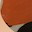

(256, 256, 4)
Shape  (32, 32, 4)


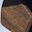

In [ ]:
(h, w) = cond1.shape[:2]
center_x, center_y = (int(w / 2), int(h / 2))

print(cond1.shape)
patch1 = cond1[center_x-16:center_x+16, center_x-16:center_x+16]
print("Shape ", patch1.shape)
cv2_imshow(patch1)

print(cond1.shape)
patch2 = cond2[center_x-16:center_x+16, center_x-16:center_x+16]
print("Shape ", patch2.shape)
cv2_imshow(patch2)

In [ ]:
print(patch1[0][0][0], patch1[0][0][1], patch1[0][0][2], patch1[0][0][3])
print(patch2[0][0][0], patch2[0][0][1], patch2[0][0][2], patch2[0][0][3])

166 191 217 255
231 206 196 255


In [ ]:
x1 = np.array([])
y1 = np.array([])
x2 = np.array([])
y2 = np.array([])

for i in range(32):
  for j in range(32):
    x1 = np.append(x1, patch1[i][j][1])
    y1 = np.append(y1, patch1[i][j][2])
    x2 = np.append(x2, patch2[i][j][1])
    y2 = np.append(y2, patch2[i][j][2])
print(int(x1.mean()), int(y1.mean()), int(x2.mean()), int(y2.mean()))

77 149 81 101


Shape (256, 256, 3)


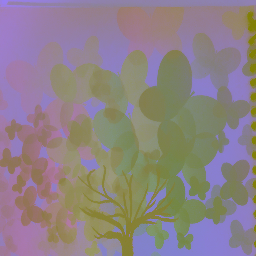

LAB full None


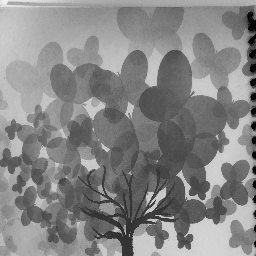

L Channel None


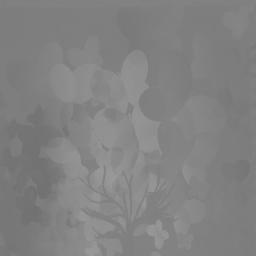

A Channel None


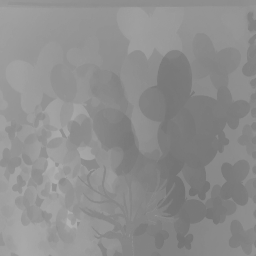

B Channel None
Shape (256, 256, 3)


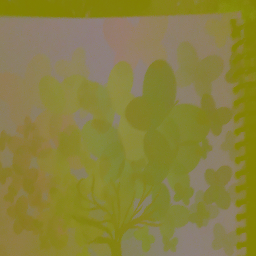

LAB full None


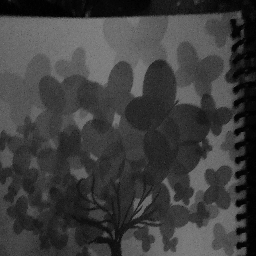

L Channel None


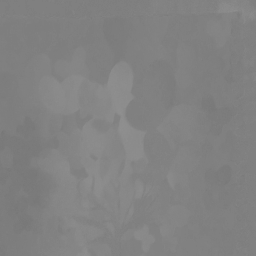

A Channel None


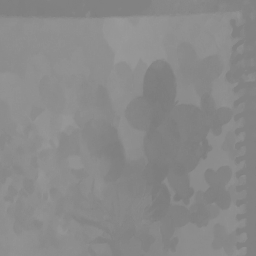

B Channel None


In [ ]:
cond1 = cv2.imread('im1.jpg', cv2.IMREAD_UNCHANGED)
cond2 = cv2.imread('im2.jpg', cv2.IMREAD_UNCHANGED)

dsize = (256, 256)

cond1 = cv2.resize(cond1, dsize)
cond2 = cv2.resize(cond2, dsize)

show_rgb_lab(cond1, rgb=False)
show_rgb_lab(cond2, rgb=False)

(256, 256, 3)
Shape  (32, 32, 3)


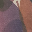

(256, 256, 3)
Shape  (32, 32, 3)


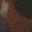

In [ ]:
(h, w) = cond1.shape[:2]
center_x, center_y = (int(w / 2), int(h / 2))

print(cond1.shape)
patch1 = cond1[center_x-16:center_x+16, center_x-16:center_x+16]
print("Shape ", patch1.shape)
cv2_imshow(patch1)

print(cond1.shape)
patch2 = cond2[center_x-16:center_x+16, center_x-16:center_x+16]
print("Shape ", patch2.shape)
cv2_imshow(patch2)

In [ ]:
x1 = np.array([])
y1 = np.array([])
x2 = np.array([])
y2 = np.array([])

for i in range(32):
  for j in range(32):
    x1 = np.append(x1, patch1[i][j][1])
    y1 = np.append(y1, patch1[i][j][2])
    x2 = np.append(x2, patch2[i][j][1])
    y2 = np.append(y2, patch2[i][j][2])
print(int(x1.mean()), int(y1.mean()), int(x2.mean()), int(y2.mean()))

94 123 51 70
